# 02. Text embeddings

Text embeddings were a huge breakthrough in the field of NLP. These methods allow to capture the meaning of words, based on the context they typically occur in. In order to train such a model we typically don't need to have a labelled dataset, but just provide a text corpus, and the training phase will find the vectorization for each word. If any word is used in a similar manner to the different one, then probably they should have similar meaning - that's the intuition for the word embeddings.

## word2vec

Word2vec is one approach to word embeddings. It was developed in 2013 at Google. There are actually two models created:
- **CBOW** - Continuous Bag-of-Words, which finds the embeddings by predicting the current word based on the context 
- **Skip-gram** - Continuous Skip-Gram Model, which learns by predicting context for given word

Typically, we can form quite a big text corpus and train the model on our own, however there are some pre-trained models which we can use in the project, to limit the time spent on the training. In our examples we're going to consider a model which is available at https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

In [59]:
%matplotlib inline

import gensim

Gensim is a popular library for topic modelling and it allows to easily use the pretrained model from Google.

In [3]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format("./model/GoogleNews-vectors-negative300.bin", 
                                                                 binary=True)

After loading the model we can check what embedding it has for a selected word. Let's consider "Poland" as an example.

In [10]:
word2vec_model.wv["Poland"]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 1.66992188e-01,  3.32031250e-02,  2.79296875e-01,  1.40625000e-01,
       -1.87500000e-01, -5.10253906e-02,  1.23535156e-01, -1.02539062e-01,
       -6.78710938e-02, -1.53198242e-02, -3.97949219e-02, -1.62109375e-01,
       -1.40625000e-01, -1.11816406e-01,  2.25585938e-01,  8.58306885e-04,
       -6.10351562e-02,  2.05078125e-01,  6.15234375e-02, -2.67578125e-01,
        3.26171875e-01,  1.05957031e-01,  1.21582031e-01, -3.94821167e-04,
        1.13281250e-01,  1.04980469e-01, -3.78906250e-01,  1.26953125e-01,
       -2.10937500e-01,  2.48046875e-01,  9.27734375e-02, -1.03027344e-01,
       -1.21093750e-01, -1.26953125e-01,  8.10546875e-02, -4.37500000e-01,
       -1.47460938e-01,  1.66015625e-01,  1.66015625e-01,  5.12695312e-02,
        1.88476562e-01,  3.22265625e-02,  2.35351562e-01, -1.30859375e-01,
       -1.75781250e-01, -5.21850586e-03, -1.66015625e-02,  5.15136719e-02,
       -8.88671875e-02,  1.48437500e-01, -1.48315430e-02,  3.44238281e-02,
       -1.76757812e-01,  

One interesting thing is how the words are encoded - let's check the size of the word vector.

In [18]:
word2vec_model["Poland"].shape

(300,)

These predefined embeddings have some useful properties and method.

What is the most similar word to "Poland"?

In [19]:
word2vec_model.similar_by_word("Poland")

[('Hungary', 0.7353940010070801),
 ('Polish', 0.7315449714660645),
 ('Czech_Republic', 0.7253509163856506),
 ('Romania', 0.706570029258728),
 ('Lithuania', 0.6741173267364502),
 ('Slovakia', 0.6652309894561768),
 ('Poles', 0.6495026350021362),
 ('Bulgaria', 0.6347231864929199),
 ('Germany', 0.6326087713241577),
 ('Ukraine', 0.6317868828773499)]

We can also do some mathematical operations on the vectors. 

Let see what is the most probable word for the following expression:
`Nadal + woman - man`

In [22]:
word2vec_model.most_similar(positive=["Nadal", "woman"], negative=["man"])

[('Sharapova', 0.8143725395202637),
 ('Mauresmo', 0.8027024269104004),
 ('Kuznetsova', 0.8018689155578613),
 ('Clijsters', 0.8017486929893494),
 ('Henin_Hardenne', 0.7852493524551392),
 ('Henin', 0.7840852737426758),
 ('Hantuchova', 0.7797292470932007),
 ('Jankovic', 0.7751113176345825),
 ('Federer', 0.7742401361465454),
 ('Dementieva', 0.7710806131362915)]

### Visualizing word embeddings

As word embeddings are able to carry the meaning of the words, not only their presence, visualizing them may be also quite useful. Unfortunately, vectors with size of 300 are not so easy to be displayed and understood by humans. Thanks for dimensionality reduction methods, we can limit their size to just 2 or 3 dimensions ans keep some of the most important properties.

**PCA** is one of the most common methods (**t-SNE** is another well-known one) and scikit-learn has it implemented.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=2019)
pca.fit(word2vec_model.vectors)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=2019,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
pca.transform((word2vec_model["Poland"], ))

array([[-0.13296461, -0.3069521 ]], dtype=float32)

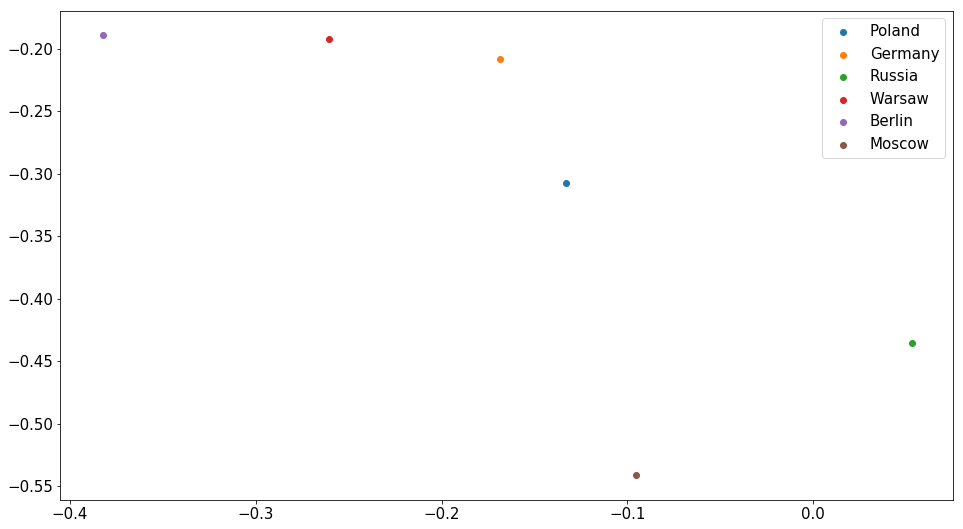

In [80]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams.update({"font.size": 15})

WORDS = ("Poland", "Germany", "Russia",
         "Warsaw", "Berlin", "Moscow")

fig, ax = plt.subplots()
for word in WORDS:
    vectors = pca.transform((word2vec_model[word], ))
    x, y = vectors.T
    ax.scatter(x, y, label=word)
ax.legend()
plt.show()

## doc2vec

Word2vec is very useful when it comes to word embeddings, but if we want to work with whole documents, it is more complex, as we don't want to encode single words anymore, but the content of whole texts.

There is a similar method, also available in gensim, that allows to perform vectorization not only on words level, but for the whole documents as well. You may find some pretrained models for doc2vec as well - in our case we took the one trained on English Wikipedia from https://github.com/jhlau/doc2vec. It was trained with CBOW approach, so the word order doesn't matter at all.

In [81]:
doc2vec_model = gensim.models.Doc2Vec.load("model/doc2vec.bin")

In [1]:
is_vector = doc2vec_model.infer_vector(("Warsaw is a capital of Poland", ))
is_not_vector = doc2vec_model.infer_vector(("Berlin is a capital of Germany", ))

NameError: name 'doc2vec_model' is not defined

In [96]:
import numpy.linalg

numpy.linalg.norm(is_vector - is_not_vector)

0.023428412